In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

# REGULAR

In [38]:
path = 'results/jabba_reg.csv'
df = pd.read_csv(path)

serial_times = list(df.groupby("size")["time"].max())
t = [list(e[1]) for e in list(df.groupby("size")["time"])]
speedup = np.array([np.ones(4) / np.array(t[i]) * serial_times[i] for i in range(len(serial_times))]).reshape(-1)
df["speedup"] = speedup

df["efficiency"] = df["speedup"] / df["CPU"]

df["karp"] = (1 / df["speedup"] - 1 / df["CPU"]) / (1 - 1 / df["CPU"])
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0.0)
df

,mode,CPU,size,time,pi,speedup,efficiency,karp
0,regular,1,5,0.053448,3.135080,1.000000,1.000000,0.000000
1,regular,2,5,0.026978,3.138560,1.981167,0.990584,0.009506
2,regular,3,5,0.018073,3.144080,2.957390,0.985797,0.007204
3,regular,4,5,0.013590,3.138560,3.932827,0.983207,0.005693
4,regular,1,6,0.559447,3.141816,1.000000,1.000000,0.000000
5,regular,2,6,0.281435,3.142396,1.987836,0.993918,0.006119
6,regular,3,6,0.189039,3.141780,2.959430,0.986477,0.006854
7,regular,4,6,0.141800,3.140256,3.945314,0.986328,0.004620
8,regular,1,7,5.544265,3.141013,1.000000,1.000000,0.000000
9,regular,2,7,2.825479,3.142527,1.962239,0.981119,0.019244


### TIME

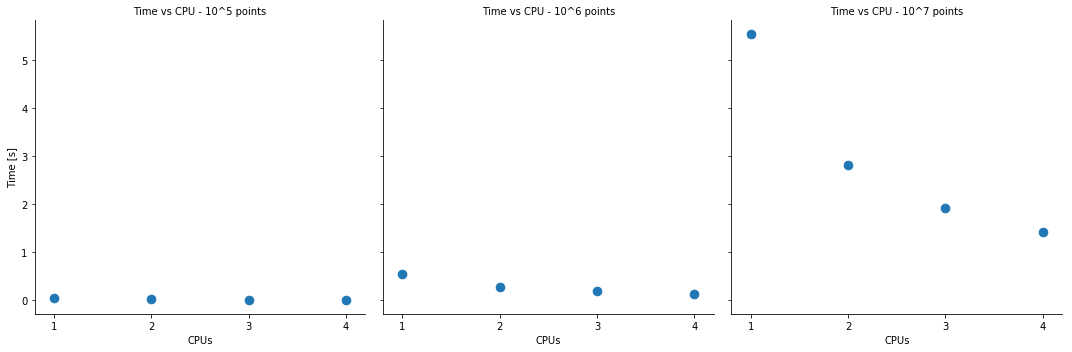

In [39]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "time", s=75)
        .set_titles("Time vs CPU - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Time [s]"))
g.set(xticks=[1,2,3,4])

### SPEEDUP

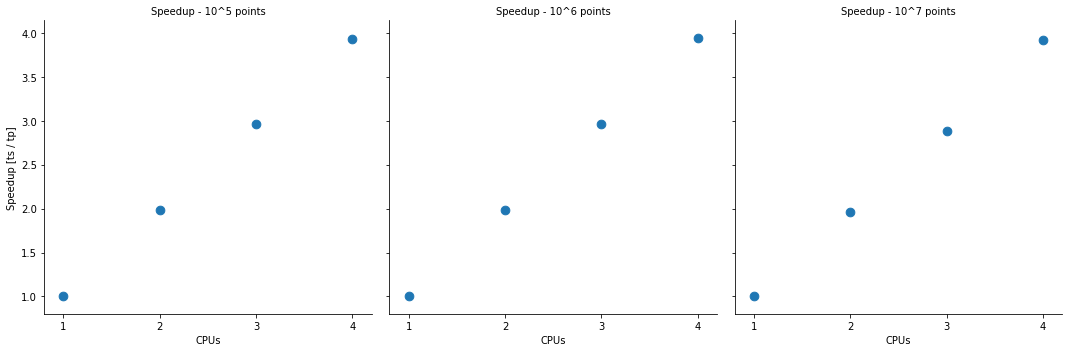

In [40]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "speedup", s=75)
        .set_titles("Speedup - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Speedup [ts / tp]"))
g.set(xticks=list(range(1,5)))

### EFFICIENCY

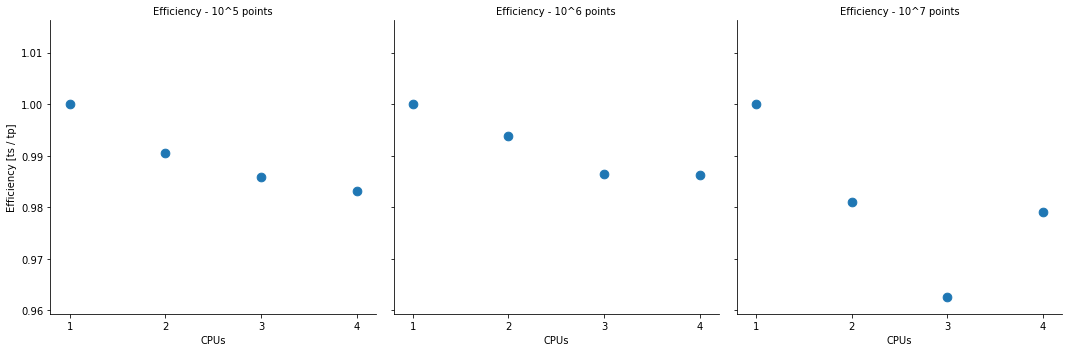

In [41]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "efficiency", s=75)
        .set_titles("Efficiency - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Efficiency [ts / tp]"))
g.set(xticks=list(range(1,5)))

### SERIAL FRACTION

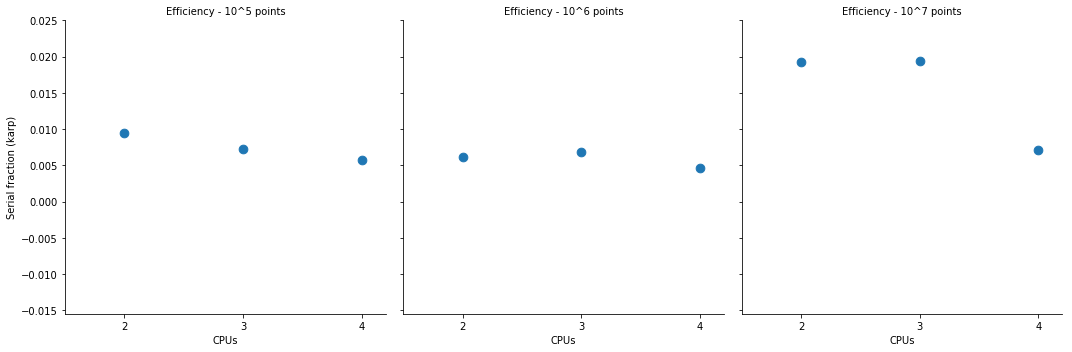

In [42]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "karp", s=75)
        .set_titles("Efficiency - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Serial fraction (karp)"))
g.set(xlim=(1.5, None))
g.set(xticks=list(range(2,5)))

# SCALED

In [44]:
path = 'results/jabba_scale.csv'
df = pd.read_csv(path)

serial_times = list(df.groupby("size")["time"].min())
t = [list(e[1]) for e in list(df.groupby("size")["time"])]
print(serial_times)
speedup = np.array([np.ones(4) / np.array(t[i]) * serial_times[i] for i in range(len(serial_times))]).reshape(-1)
df["speedup"] = speedup * df["CPU"]

df["efficiency"] = df["speedup"] / df["CPU"]

df["karp"] = (1 / df["speedup"] - 1 / df["CPU"]) / (1 - 1 / df["CPU"])
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0.0)
df

[0.053504467010500004, 0.560136079788, 5.61586833]


,mode,CPU,size,time,pi,speedup,efficiency,karp
0,scale,1,5,0.053504,3.134560,1.000000,1.000000,0.000000
1,scale,2,5,0.054856,3.140760,1.950722,0.975361,0.025261
2,scale,3,5,0.056634,3.136507,2.834226,0.944742,0.029245
3,scale,4,5,0.054521,3.141240,3.925398,0.981349,0.006335
4,scale,1,6,0.560807,3.145328,0.998805,0.998805,0.000000
5,scale,2,6,0.560136,3.141882,2.000000,1.000000,0.000000
6,scale,3,6,0.569819,3.141368,2.949020,0.983007,0.008644
7,scale,4,6,0.575963,3.140691,3.890087,0.972522,0.009418
8,scale,1,7,5.615868,3.142210,1.000000,1.000000,0.000000
9,scale,2,7,5.649308,3.141605,1.988162,0.994081,0.005954


### TIME

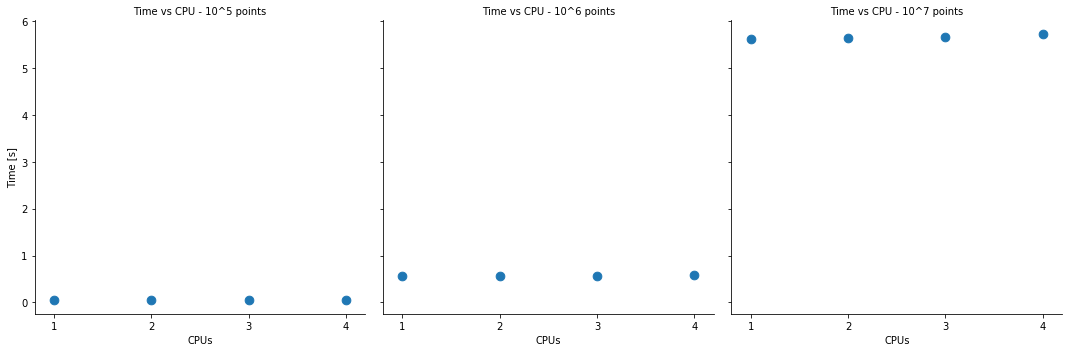

In [45]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "time", s=75)
        .set_titles("Time vs CPU - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Time [s]"))
g.set(xticks=list(range(1,5)))

### SPEEDUP

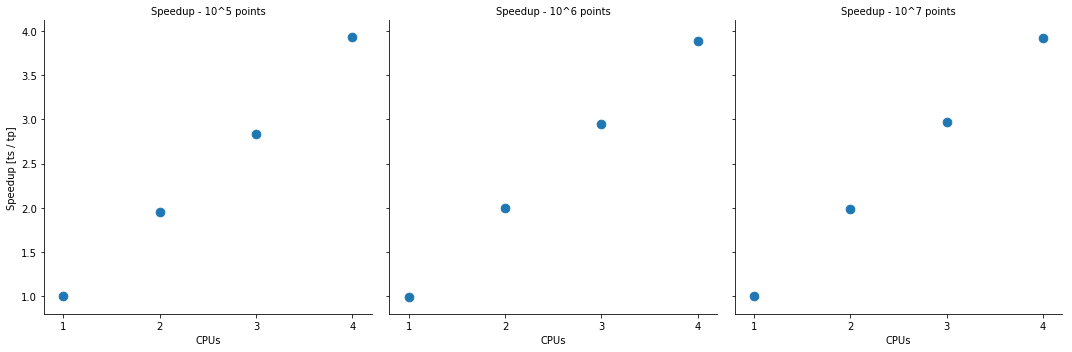

In [46]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "speedup", s=75)
        .set_titles("Speedup - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Speedup [ts / tp]"))
g.set(xticks=list(range(1,5)))

### EFFICIENCY

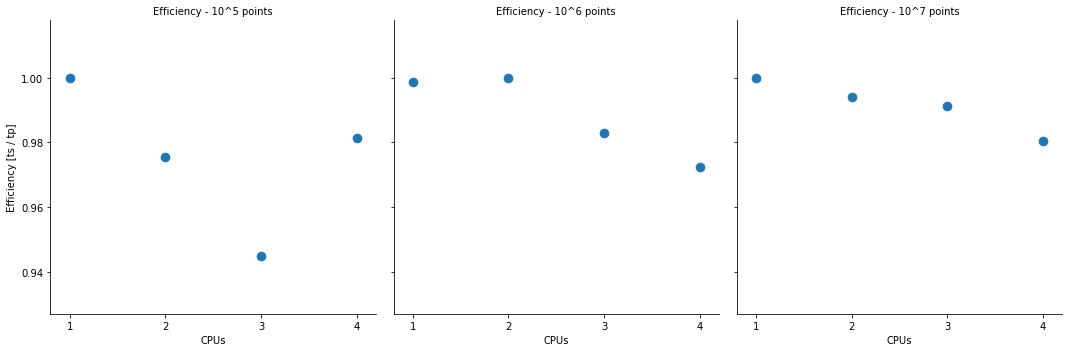

In [47]:
g = sns.FacetGrid(df, col="size",height=5)
g = (g.map(plt.scatter, "CPU", "efficiency", s=75)
        .set_titles("Efficiency - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Efficiency [ts / tp]"))
g.set(xticks=list(range(1,5)))

### SERIAL FRACTION

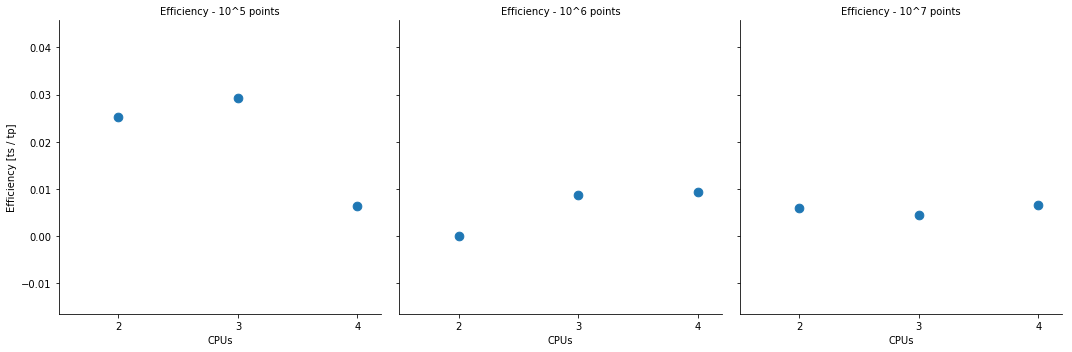

In [48]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "karp", s=75)
        .set_titles("Efficiency - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Efficiency [ts / tp]"))
g.set(xlim=(1.5, None))
g.set(xticks=list(range(2,5)))